#                                 GDP ANALYSIS - ASSIGNMENT

**Import the Required Libraries & Supress any unwanted warnings**

In [1]:
import numpy as np
import seaborn as sn
import pandas as pd
import scipy as sc
import matplotlib as plt
import glob,os

# Supress Warnings

import warnings
warnings.filterwarnings('ignore')
print(os.getcwd())

D:\try ml\eda\gdp analysis


# GDP Analysis - Part 1

**Reading the CSV File and preparing the Dataframe to process the data for Analysis**

In [2]:
# Reading the File for PartI-A analysis
GDP = pd.read_csv(r"D:\try ml\eda\gdp analysis\GDP Analysis Data File\State-wise Gross Domestic Product (GDP) at Current Price on Yearly Basis.csv")
GDP.head()


,Items Description,Duration,Andhra Pradesh,Arunachal Pradesh,Assam,Bihar,Chhattisgarh,Goa,Gujarat,Haryana,...,Telangana,Tripura,Uttar Pradesh,Uttarakhand,West Bengal1,Andaman & Nicobar Islands,Chandigarh,Delhi,Puducherry,All_India GDP
0,GSDP - CURRENT PRICES (` in Crore),2011-12,379402.0,11063.0,143175.0,247144.0,158074.0,42367.0,615606.0,297539.0,...,359433.0,19208.0,724049.0,115523.0,NaN,3979.0,18768.0,343767.0,16818.0,8736039.0
1,GSDP - CURRENT PRICES (` in Crore),2012-13,411404.0,12547.0,156864.0,282368.0,177511.0,38120.0,724495.0,347032.0,...,401493.0,21663.0,822903.0,131835.0,NaN,4421.0,21609.0,391238.0,18875.0,9946636.0
2,GSDP - CURRENT PRICES (` in Crore),2013-14,464272.0,14602.0,177745.0,317101.0,206690.0,35921.0,807623.0,400662.0,...,452186.0,25593.0,944146.0,149817.0,NaN,5159.0,24787.0,443783.0,21870.0,11236635.0
3,GSDP - CURRENT PRICES (` in Crore),2014-15,526468.0,16761.0,198098.0,373920.0,234982.0,40633.0,895027.0,437462.0,...,511178.0,29667.0,1043371.0,161985.0,NaN,5721.0,27844.0,492424.0,24089.0,12433749.0
4,GSDP - CURRENT PRICES (` in Crore),2015-16,609934.0,18784.0,224234.0,413503.0,260776.0,45002.0,994316.0,485184.0,...,575631.0,NaN,1153795.0,184091.0,NaN,NaN,30304.0,551963.0,26533.0,13675331.0


In [3]:
GDP.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 36 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Items  Description         9 non-null      object 
 1   Duration                   9 non-null      object 
 2   Andhra Pradesh             9 non-null      float64
 3   Arunachal Pradesh          9 non-null      float64
 4   Assam                      9 non-null      float64
 5   Bihar                      9 non-null      float64
 6   Chhattisgarh               9 non-null      float64
 7   Goa                        9 non-null      float64
 8   Gujarat                    9 non-null      float64
 9   Haryana                    9 non-null      float64
 10  Himachal Pradesh           7 non-null      float64
 11  Jammu & Kashmir            9 non-null      float64
 12  Jharkhand                  9 non-null      float64
 13  Karnataka                  9 non-null      float64
 14

In [4]:
#Dropping the rows: '(% Growth over the previous year)' and 'GSDP - CURRENT PRICES (` i
#Dropping Column = "West Bengal1" as it only haven Crore)' for the year 2016-17
GDP = GDP[GDP.Duration != '2016-17']

In [5]:
#Dropping Column = "West Bengal1" as it only have NA values and "All_India GDP" as it's not required in this analysis
GDP = GDP.drop(['West Bengal1','All_India GDP'],axis=1)

GDP.head()

,Items Description,Duration,Andhra Pradesh,Arunachal Pradesh,Assam,Bihar,Chhattisgarh,Goa,Gujarat,Haryana,...,Sikkim,Tamil Nadu,Telangana,Tripura,Uttar Pradesh,Uttarakhand,Andaman & Nicobar Islands,Chandigarh,Delhi,Puducherry
0,GSDP - CURRENT PRICES (` in Crore),2011-12,379402.0,11063.0,143175.0,247144.0,158074.0,42367.0,615606.0,297539.0,...,11165.0,751485.0,359433.0,19208.0,724049.0,115523.0,3979.0,18768.0,343767.0,16818.0
1,GSDP - CURRENT PRICES (` in Crore),2012-13,411404.0,12547.0,156864.0,282368.0,177511.0,38120.0,724495.0,347032.0,...,12338.0,855481.0,401493.0,21663.0,822903.0,131835.0,4421.0,21609.0,391238.0,18875.0
2,GSDP - CURRENT PRICES (` in Crore),2013-14,464272.0,14602.0,177745.0,317101.0,206690.0,35921.0,807623.0,400662.0,...,13862.0,971090.0,452186.0,25593.0,944146.0,149817.0,5159.0,24787.0,443783.0,21870.0
3,GSDP - CURRENT PRICES (` in Crore),2014-15,526468.0,16761.0,198098.0,373920.0,234982.0,40633.0,895027.0,437462.0,...,15209.0,1092564.0,511178.0,29667.0,1043371.0,161985.0,5721.0,27844.0,492424.0,24089.0
4,GSDP - CURRENT PRICES (` in Crore),2015-16,609934.0,18784.0,224234.0,413503.0,260776.0,45002.0,994316.0,485184.0,...,16637.0,1212668.0,575631.0,NaN,1153795.0,184091.0,NaN,30304.0,551963.0,26533.0


In [6]:
#Filtering the (% Growth over previous year) rows for duration 2013-14, 2014-15 and 2015-16.
GDP.rename(columns={'Items  Description':'Items'}, inplace = True)

GDP_1A = GDP.loc[GDP.Items != 'GSDP - CURRENT PRICES (` in Crore)', :]

#Dropping Column = "Items Description" as it's not required in this analysis
GDP_1A.drop('Items',axis=1, inplace = True)

# #Setting the Duration as the Index of the dataframe
GDP_1A.set_index('Duration', inplace = True)

# #Transposing the rows and columns
GDP_1A = GDP_1A.transpose()

GDP_1A.head()

Duration,2012-13,2013-14,2014-15,2015-16
Andhra Pradesh,8.43,12.85,13.40,15.85
Arunachal Pradesh,13.41,16.38,14.79,12.07
Assam,9.56,13.31,11.45,13.19
Bihar,14.25,12.30,17.92,10.59
Chhattisgarh,12.30,16.44,13.69,10.98


In [7]:
#Calculating the mean of row "(% Growth over previous year)" for duration 2013-14, 2014-15 and 2015-16 and round value to 2
GDP_1A['Average'] = round(GDP_1A.mean(axis=1),2)
# Calculate the Median value of 2015-16 GSDP to find out the National Average amoung the states
GDP_1A = GDP_1A.astype('float64')
GDP_National_Avg = round(GDP_1A['2015-16'].median(axis=0),2)
GDP_1A.head()

Duration,2012-13,2013-14,2014-15,2015-16,Average
Andhra Pradesh,8.43,12.85,13.40,15.85,12.63
Arunachal Pradesh,13.41,16.38,14.79,12.07,14.16
Assam,9.56,13.31,11.45,13.19,11.88
Bihar,14.25,12.30,17.92,10.59,13.76
Chhattisgarh,12.30,16.44,13.69,10.98,13.35


# The National GSDP Average for 2015-2016 is 11%

In [8]:
GDP_National_Avg

11.09

**GDP under National GDP for 2015-16**

In [9]:
GDP_National_Under = GDP_1A[GDP_1A['2015-16'] < GDP_National_Avg]
GDP_National_Under = GDP_National_Under.sort_values('2015-16',ascending=True)
GDP_National_Under

Duration,2012-13,2013-14,2014-15,2015-16,Average
Odisha,13.34,12.95,10.37,6.19,10.71
Chandigarh,15.14,14.71,12.33,8.84,12.76
Sikkim,10.51,12.35,9.72,9.39,10.49
Meghalaya,9.81,4.87,6.41,9.58,7.67
Puducherry,12.23,15.87,10.14,10.15,12.10
Uttar Pradesh,13.65,14.73,10.51,10.58,12.37
Bihar,14.25,12.30,17.92,10.59,13.76
Goa,-10.02,-5.77,13.12,10.75,2.02
Haryana,16.63,15.45,9.18,10.91,13.04
Chhattisgarh,12.30,16.44,13.69,10.98,13.35


**GDP Above National GDP for 2015-16**

In [10]:
GDP_National_Above = GDP_1A[GDP_1A['2015-16'] > GDP_National_Avg]
GDP_National_Above = GDP_National_Above.sort_values('2015-16',ascending=True)
GDP_National_Above

Duration,2012-13,2013-14,2014-15,2015-16,Average
Karnataka,14.56,18.24,12.70,11.42,14.23
Jharkhand,15.77,7.92,15.14,11.44,12.57
Kerala,13.26,12.79,13.11,11.85,12.75
Arunachal Pradesh,13.41,16.38,14.79,12.07,14.16
Delhi,13.81,13.43,10.96,12.09,12.57
Telangana,11.70,12.63,13.05,12.61,12.50
Madhya Pradesh,20.71,14.91,10.11,12.86,14.65
Assam,9.56,13.31,11.45,13.19,11.88
Uttarakhand,14.12,13.64,8.12,13.65,12.38
Andhra Pradesh,8.43,12.85,13.40,15.85,12.63


**The average growth of states for the duration 2013-14, 2014-15 and 2015-16.**

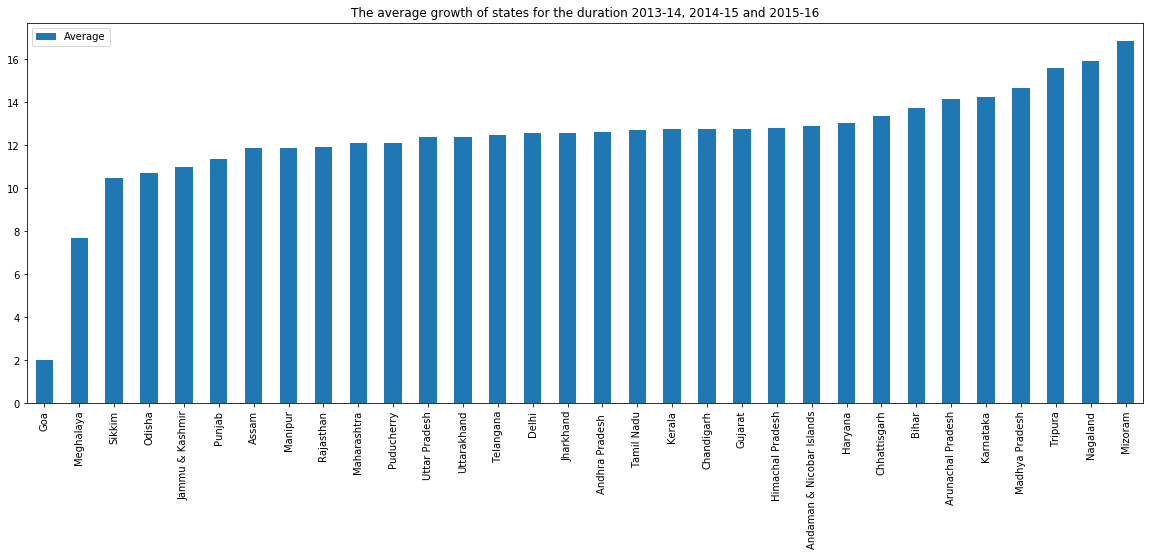

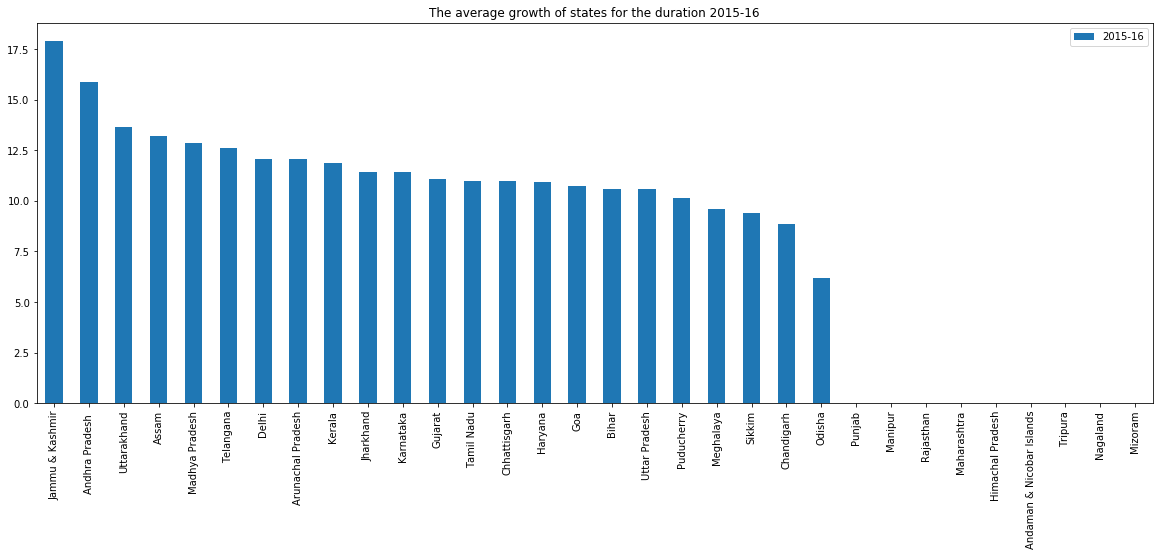

In [11]:
#Sorting the datafrane by Column: "Average"
GDP_1A.sort_values(by='Average', axis=0, ascending=True, inplace=True)

#Sorting the datafrane by Column: "2015-16"
GDP_2015_16_States = GDP_1A.sort_values(by='2015-16', axis=0, ascending=False)

#Plotting the bar graph for States(x-axis) vs. Average (y-axis)
GDP_1A.plot(kind = 'bar', y = "Average", figsize=(20, 7), title = 'The average growth of states for the duration 2013-14, 2014-15 and 2015-16')

#Plotting the bar graph for complete Data Frame
GDP_2015_16_States.plot(kind = 'bar', y = "2015-16", figsize=(20, 7), title = 'The average growth of states for the duration 2015-16' )

# The top 5 and the bottom 5 states based on total GDP for the year 2015-16.


In [12]:
GDP_Top_5 = GDP_1A.sort_values("2015-16", ascending = False).head(5)
GDP_Bottom_5 = GDP_1A.sort_values("2015-16", ascending = False)
GDP_Bottom_5.dropna(subset=["2015-16"],inplace=True)
GDP_Bottom_5 = GDP_Bottom_5.tail(5)
# GDP_Bottom_5

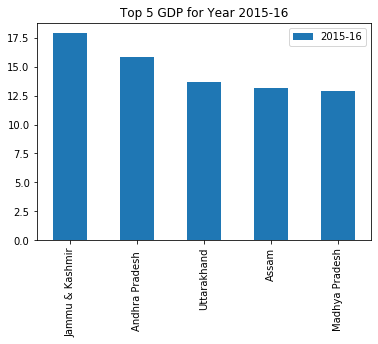

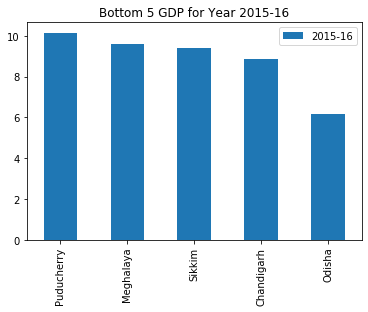

In [13]:
GDP_Top_5.plot(kind = 'bar', y = "2015-16", title = 'Top 5 GDP for Year 2015-16')
GDP_Bottom_5.plot(kind = 'bar', y = "2015-16", title = 'Bottom 5 GDP for Year 2015-16')

# GDP Analysis - PART 2

# Path for Files from where all the State data will be fetched
**Path need to be updated as and when required to run the below mentioned Analysis**

In [14]:
path = 'Indian States'
all_files = glob.glob(path + "/*.csv")
listoffiles = []

# Merging of all the States CSV files in one Dataframe for Analysis

In [15]:
for filename in all_files:
    df = pd.read_csv(filename, index_col=None, header=0, encoding = 'unicode_escape')
    df = df[['Item','2014-15']] # We need data only for 2014-15
    df['Item'] = df['Item'].map(lambda x: x.strip('*'))
    df = df.T
    new_header = df.iloc[0]
    df = df[1:]
    df.columns = new_header
    df['States'] = filename.split('\\')[-1].split('-')[1]
    listoffiles.append(df)                    

In [16]:
State_dataset = pd.concat(listoffiles, axis=0,ignore_index=True)


ValueError: No objects to concatenate

In [ ]:
# Drop UT from dataset as these are not states and not required in this Analysis
State_dataset = State_dataset[State_dataset.States != 'Delhi']
State_dataset = State_dataset[State_dataset.States != 'Chandigarh']
State_dataset = State_dataset[State_dataset.States != 'Puducherry']

State_dataset.info()

**Set the Index to State & also uniform all the values in the dataframe to Float Type**

In [ ]:
State_dataset.set_index('States', inplace = True) #Setting the Index to the States
State_dataset = State_dataset.astype('float64') #converting the values to Float to analyze and perform mathematical operations
State_dataset.info()

**Prepare the list for TOP5 & Bottom 5 Per Capita**

In [ ]:
GDP_per_capita = State_dataset.sort_values("Per Capita GSDP (Rs.)", ascending=False)
GDP_per_capita_Top5 = State_dataset.sort_values("Per Capita GSDP (Rs.)", ascending=False).head(5)

GDP_per_capita_Bottom5 = State_dataset.sort_values("Per Capita GSDP (Rs.)", ascending=False).tail(5)

# To Find out the Top 5 GDP Per Capita - Plot the Graph

In [ ]:
GDP_per_capita.plot(kind = 'bar', y = "Per Capita GSDP (Rs.)", figsize=(12, 5), title = 'States (GDP Per Capita)')
GDP_per_capita_Top5.plot(kind = 'bar', y = "Per Capita GSDP (Rs.)", title = 'Top 5 States (GDP Per Capita)')
GDP_per_capita_Bottom5.plot(kind = 'bar', y = "Per Capita GSDP (Rs.)", title = 'Bottom 5 States (GDP Per Capita)')

# GDP Ratio of Highest Per Capita to Lowest Per Capita

In [ ]:
GDP_Ratio = GDP_per_capita_Top5.iloc[0]["Per Capita GSDP (Rs.)"] / GDP_per_capita_Bottom5.iloc[-1]["Per Capita GSDP (Rs.)"]

In [ ]:
GDP_Ratio.round(2)

# The GDP Ratio comes to 8% when compared Highest Per Capita to Low Per Capita

# Percentage contribution of the primary, secondary and tertiary sectors as a percentage of the total GDP for all the states.

In [ ]:
Sector_Contribution = State_dataset[['Primary','Secondary','Tertiary','Gross State Domestic Product']]

Sector_Contribution.sort_values('Gross State Domestic Product', ascending=False, inplace = True)

In [ ]:
Sector_Contribution['Primary %'] = round(((Sector_Contribution['Primary']/Sector_Contribution['Gross State Domestic Product'])*100))
Sector_Contribution['Secondary %'] = round(((Sector_Contribution['Secondary']/Sector_Contribution['Gross State Domestic Product'])*100))
Sector_Contribution['Tertiary %'] = round(((Sector_Contribution['Tertiary']/Sector_Contribution['Gross State Domestic Product'])*100))

In [ ]:
Sector_Contribution.loc[:, ['Primary %','Secondary %','Tertiary %']].plot.bar(stacked = True, figsize = (12,3), title = 'Sector Contribution accoss the various States')

# Categorizing the states into four groups based on the GDP per capita
**The Quantile Values for GDP Per Capita used are as 0.20, 0.50, 0.85 & 1 to categorized the States**

In [ ]:
State_Categorization = State_dataset["Per Capita GSDP (Rs.)"].quantile([0.20, 0.50, 0.85, 1.00])

In [ ]:
State_category = State_dataset["Per Capita GSDP (Rs.)"]
State_dataset['Categorization'] = pd.qcut(State_category, q=[0.20, 0.50, 0.85, 1.00], labels=['C3', 'C2','C1'])
State_dataset['Categorization'] = State_dataset['Categorization'].cat.add_categories("C4").fillna("C4")

In [ ]:
State_dataset = State_dataset.sort_values('Categorization', ascending=False)
Categorized_States = State_dataset.groupby('Categorization')

# Preparing the 4 different Categories for the States 
# They will be mentioned as C1, C2, C3 & C4 based to Quantile Category

In [ ]:
C1_category = Categorized_States.get_group('C1')
C2_category = Categorized_States.get_group('C2')
C3_category = Categorized_States.get_group('C3')
C4_category = Categorized_States.get_group('C4')

# Based on Quantile Value, The C1 States are as:

In [ ]:
C1_category = C1_category.drop(['Categorization','Primary','Secondary','Tertiary','Crops','Livestock','Forestry and logging','Fishing and aquaculture','Trade & repair services','Hotels & restaurants','Railways','Road transport','Water transport','Air transport','Services incidental to transport','Storage','Communication & services related to broadcasting','TOTAL GSVA at basic prices','Taxes on Products','Subsidies on products'], axis=1)
C1_category = C1_category.drop(["Population ('00)"], axis=1)
C1_category = C1_category.T

In [ ]:
# Total_Growth_Sector
C1_category['Total_Growth_Sector'] = C1_category.sum(axis=1)
C1_category.astype('float64') #Update the values as uniform on updated dataframe 

# Get the % of Growth Sectors towards the GDP of the States Categories

In [ ]:
GSDP_C1 = C1_category.iloc[-2,4] #The GSDP Value for the Category of State
C1_category['Growth%'] = (C1_category['Total_Growth_Sector'] / GSDP_C1)*100

In [ ]:
C1_Sub_sector_Growth = C1_category.drop(['Gross State Domestic Product','Per Capita GSDP (Rs.)'], axis=0)
C1_Sub_sector_Growth = C1_Sub_sector_Growth.sort_values('Growth%', ascending=False)

# Get the Cumulative sum of the Sub Sectors of States which contributes towards the 80% of the GDP.

In [ ]:
C1_Sub_sector_Growth['Cumulative'] = C1_Sub_sector_Growth['Growth%'].cumsum()

**Based on Quantile Value, we are projecting all the Sub Sectors which contributes towards ~80% of GDP**

In [ ]:
C1_Top_sectors = C1_Sub_sector_Growth[C1_Sub_sector_Growth.Cumulative < 85]
C1_Top_sectors

In [ ]:
C1_Sub_sector_Growth.plot.pie(y="Growth%", figsize = (10,10), title = 'Contribution of Sub Sectors as % for C1')
C1_Top_sectors.plot(kind = 'bar', y = "Cumulative" , figsize = (10,3), title = 'Top Sectors for 80% GDP for C1 States')


# Based on Quantile Value, The C2 States are as:

In [ ]:
C2_category = C2_category.drop(['Categorization','Primary','Secondary','Tertiary','Crops','Livestock','Forestry and logging','Fishing and aquaculture','Trade & repair services','Hotels & restaurants','Railways','Road transport','Water transport','Air transport','Services incidental to transport','Storage','Communication & services related to broadcasting','TOTAL GSVA at basic prices','Taxes on Products','Subsidies on products'], axis=1)
C2_category = C2_category.drop(["Population ('00)"], axis=1)
C2_category = C2_category.T

In [ ]:
# Total_Growth_Sector
C2_category['Total_Growth_Sector'] = C2_category.sum(axis=1)
C2_category.astype('float64')

In [ ]:
GSDP_C2 = C2_category.iloc[-2,9]
C2_category['Growth%'] = (C2_category['Total_Growth_Sector'] / GSDP_C2)*100

In [ ]:
C2_Sub_sector_Growth = C2_category.drop(['Gross State Domestic Product','Per Capita GSDP (Rs.)'], axis=0)
C2_Sub_sector_Growth = C2_Sub_sector_Growth.sort_values('Growth%', ascending=False)
C2_Sub_sector_Growth['Cumulative'] = C2_Sub_sector_Growth['Growth%'].cumsum()

In [ ]:
C2_Top_sectors = C2_Sub_sector_Growth[C2_Sub_sector_Growth.Cumulative < 85]
C2_Top_sectors

In [ ]:
C2_Top_sectors.plot(kind = 'bar', y = "Cumulative", figsize = (10,3), title = 'Top Sectors for 80% GDP for C2 States')
C2_Sub_sector_Growth.plot.pie(y="Growth%", figsize = (10,10), title = 'Contribution of Sub Sectors as % for C2 Category')

# Based on Quantile Value, The C3 States are as:

In [ ]:
C3_category = C3_category.drop(['Categorization','Primary','Secondary','Tertiary','Crops','Livestock','Forestry and logging','Fishing and aquaculture','Trade & repair services','Hotels & restaurants','Railways','Road transport','Water transport','Air transport','Services incidental to transport','Storage','Communication & services related to broadcasting','TOTAL GSVA at basic prices','Taxes on Products','Subsidies on products'], axis=1)
C3_category = C3_category.drop(["Population ('00)"], axis=1)
C3_category = C3_category.T

In [ ]:
# Total_Growth_Sector
C3_category['Total_Growth_Sector'] = C3_category.sum(axis=1)
C3_category.astype('float64')

In [ ]:
GSDP_C3 = C3_category.iloc[-2,8]
C3_category['Growth%'] = (C3_category['Total_Growth_Sector'] / GSDP_C3)*100

In [ ]:
C3_Sub_sector_Growth = C3_category.drop(['Gross State Domestic Product','Per Capita GSDP (Rs.)'], axis=0)
C3_Sub_sector_Growth = C3_Sub_sector_Growth.sort_values('Growth%', ascending=False)
C3_Sub_sector_Growth['Cumulative'] = C3_Sub_sector_Growth['Growth%'].cumsum()
C3_Top_sectors = C3_Sub_sector_Growth[C3_Sub_sector_Growth.Cumulative < 85]
C3_Top_sectors

In [ ]:
C3_Top_sectors.plot(kind = 'bar', y = "Cumulative", figsize = (10,3), title = 'Top Sectors for 80% GDP for C3 States')
C3_Sub_sector_Growth.plot.pie(y="Growth%", figsize = (10,10), title = 'Contribution of Sub Sectors as % for C3 Category')

# Based on Quantile Value, The C4 States are as:

In [ ]:
C4_category = C4_category.drop(['Categorization','Primary','Secondary','Tertiary','Crops','Livestock','Forestry and logging','Fishing and aquaculture','Trade & repair services','Hotels & restaurants','Railways','Road transport','Water transport','Air transport','Services incidental to transport','Storage','Communication & services related to broadcasting','TOTAL GSVA at basic prices','Taxes on Products','Subsidies on products'], axis=1)
C4_category = C4_category.drop(["Population ('00)"], axis=1)
C4_category = C4_category.T

In [ ]:
# Total_Growth_Sector
C4_category['Total_Growth_Sector'] = C4_category.sum(axis=1)
C4_category.astype('float64')

In [ ]:
GSDP_C4 = C4_category.iloc[-2,6]
C4_category['Growth%'] = (C4_category['Total_Growth_Sector'] / GSDP_C4)*100

In [ ]:
C4_Sub_sector_Growth = C4_category.drop(['Gross State Domestic Product','Per Capita GSDP (Rs.)'], axis=0)
C4_Sub_sector_Growth = C4_Sub_sector_Growth.sort_values('Growth%', ascending=False)
C4_Sub_sector_Growth['Cumulative'] = C4_Sub_sector_Growth['Growth%'].cumsum()
C4_Top_sectors = C4_Sub_sector_Growth[C4_Sub_sector_Growth.Cumulative < 85]
C4_Top_sectors

In [ ]:
C4_Top_sectors.plot(kind = 'bar', y = "Growth%", figsize = (10,3), title = 'Top Sectors for 80% GDP for C4 States')
C4_Sub_sector_Growth.plot.pie(y="Growth%", figsize = (10,10), title = 'Contribution of Sub Sectors as % for C4 Category')

# GDP and Education Dropout Rates

# Get the File again in separate dataframe for Education Dropout Rates for all States

In [ ]:
path_gdp = 'GDP Assignment Files'
GDP_Edu_Drop = pd.read_csv('GDP Assignment Files\State UT-wise Average Annual Drop-Out Rate from 2012-13 to 2014-15.csv')
GDP_Edu_Drop.info()

# Based on the requirement, the analysis has to be done only for 2014-15 and only for Primary, Upper Primary & Secondary

In [ ]:
# Dropping all those columns which are not rquired in this Analysis
GDP_Edu_Drop = GDP_Edu_Drop.drop(['Sl. No.', 'Primary - 2012-2013', 'Primary - 2014-2015.1', 'Upper Primary - 2012-2013', 'Upper Primary - 2013-2014', 'Secondary - 2012-2013', 'Secondary - 2013-2014', 'Senior Secondary - 2012-2013', 'Senior Secondary - 2013-2014', 'Senior Secondary - 2014-2015'], axis=1)

In [ ]:
GDP_Edu_Drop.columns = ['States','Primary','Upper Primary','Secondary'] #Rename the Columns for better readability.

In [ ]:
GDP_Edu_Drop.set_index('States',inplace=True) # Set the Index back to States

**As we need to merge this data with the existing states GDP data, we need to make sure that the States Names are uniform in both the Dataframe Sets so that the query can merge the two sets. Hence, rename the states naming conventions for some.**

In [ ]:
GDP_Edu_Drop.rename(index= {"Andhra Pradesh":"Andhra_Pradesh",
                    "Arunachal Pradesh":"Arunachal_Pradesh",
                    "Chhatisgarh":"Chhattisgarh",
                    "Himachal Pradesh":"Himachal_Pradesh",
                    "Madhya Pradesh":"Madhya_Pradesh",
                    "Uttar Pradesh":"Uttar_Pradesh",
                    "Uttrakhand":"Uttarakhand",
                    "Tamil Nadu":"Tamil_Nadu"}, inplace=True)

# Let's merge the Two Datasets with the key value as 'States' to prepare the final dataset for this analysis

In [ ]:
GDP_Edu_Drop_Final = pd.merge(GDP_Edu_Drop,State_dataset["Per Capita GSDP (Rs.)"], on='States', how= 'left')

In [ ]:
GDP_Edu_Drop_Final.sort_values("Per Capita GSDP (Rs.)",ascending=False)
# NaN values can be removed using below code, however in this analysis, let Python handle the NaN values while Plotting Graphs
# GDP_Edu_Drop_Final = GDP_Edu_Drop_Final.dropna(subset=["Per Capita GSDP (Rs.)"]) 

In [ ]:
GDP_Edu_Drop_Final

# Project the Scatter Plot for Primary Dropout Vs GDP. In the Below Plot it is clearly visible that the lower GDP, the higher the Dropout.

In [ ]:
Primary_Plot = GDP_Edu_Drop_Final.plot.scatter(x='Per Capita GSDP (Rs.)',y='Primary', c='Black', title='Primary Dropout vs GDP')

# Project the Scatter Plot for Upper Primary Dropout Vs GDP. In the Below Plot it is clearly visible that the lower GDP, the higher the Dropout.

In [ ]:
Upper_Primary_Plot = GDP_Edu_Drop_Final.plot.scatter(x='Per Capita GSDP (Rs.)',y='Upper Primary', c='Black', title='Upper Primary Dropout vs GDP')

# Project the Scatter Plot for Secondary Dropout Vs GDP. In the Below Plot it is visible to some extend that the lower GDP, the higher the Dropout.

In [ ]:
Secondary_Plot = GDP_Edu_Drop_Final.plot.scatter(x='Per Capita GSDP (Rs.)',y='Secondary', c='Black',title='Secondary Dropout vs GDP')